# Importing libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import imghdr  # determines the type of image contained in a file or byte stream.

C:\Users\VIJAY\AppData\Local\Temp\ipykernel_12708\4210055052.py:6: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr  # determines the type of image contained in a file or byte stream.


In [60]:
# base directory for dataset
data_dir = 'data'

In [61]:
# desired image formats
img_ext = ['jpeg','jpg','bmp','png']

In [62]:
# getting the data directories inside base directory
os.listdir(data_dir)

['bike', 'car']

In [66]:
# getting number of images in each folders
print('car -',len(os.listdir(os.path.join(data_dir,'car'))))
print('bike -',len(os.listdir(os.path.join(data_dir,'bike'))))


car - 201
bike - 122


---

# Data Preparation
- iterate through -
    - each image 
    - each folder
    - of base dir
- checks if the image is of desired extension, else remove that file from device

In [21]:
# getting the directories inside the data folder as list
for img_class in os.listdir(data_dir): #['car','bike']
    for image in os.listdir(os.path.join(data_dir,img_class)): # iterate through every images in each folder
        img_path = os.path.join(data_dir,img_class,image) # file path for each images
        try:
            tip = imghdr.what(img_path) 
            if tip not in img_ext: # checks for desired extensions
                print(f'Oopss:( image not found in ext list - {img_path}')
                os.remove(img_path) # removes the file from device
        except Exception as e:
            print(f'Issue with image {img_path}')



Oopss:( image not found in ext list - data\bike\banner-fzs-fi-v4_m.webp
Oopss:( image not found in ext list - data\bike\banner-r15s_m.webp
Oopss:( image not found in ext list - data\bike\ten-best-motorcycles-for-carrying-a-passenger---main.webp
Oopss:( image not found in ext list - data\bike\Types-of-Motorcycles.jpg
Oopss:( image not found in ext list - data\car\50-most-expensive-cars-in-the-world.webp
Oopss:( image not found in ext list - data\car\GranTurismo-Celebration_GT20One-Off20Prisma20and20Luce.jpg
Oopss:( image not found in ext list - data\car\Hyderabad-entrepreneur-buys-most-expensive-car.jpeg


---

# Importing Data 


In [2]:
# creates a dataset from images in directory
data=tf.keras.utils.image_dataset_from_directory('data') 
# bike - 0
# car - 1

Found 323 files belonging to 2 classes.


In [4]:
# represent data as numoy array
data_iterator=data.as_numpy_iterator()

In [5]:
# getting a batch from the iterator
batch = data_iterator.next()

In [6]:
batch[0].shape # 32 images, 256x256 size, 3 channels(rgb)

(32, 256, 256, 3)

In [7]:
# first image
batch[0][0]

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [8]:
# first label
batch[1][0]

0

In [9]:
# max value in the array
batch[0][0].min()

0.0

In [10]:
# min value in the array
batch[0][0].max()

255.0

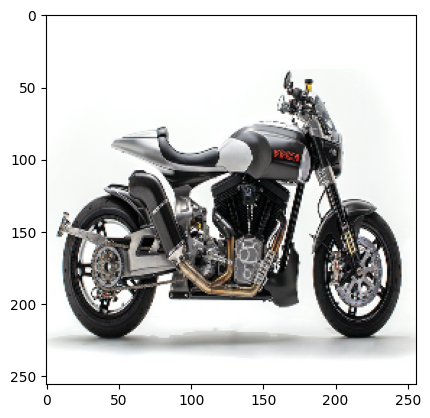

In [11]:
plt.imshow(batch[0][0]/255) # divide by 255 inorder to keep range (0,1)

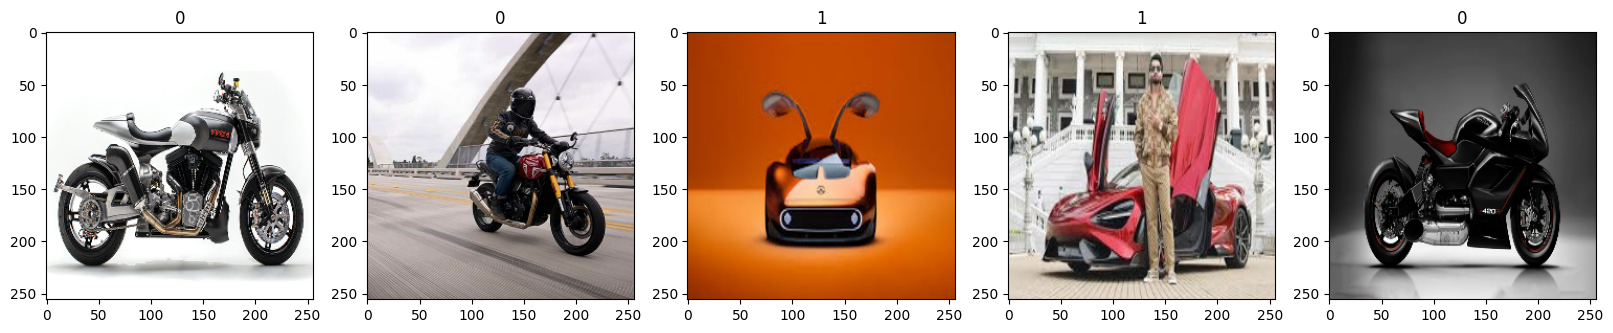

In [12]:
# for identifying the lables 
fix, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx,img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

----

# Data preprocessing

In [16]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [17]:
data = data.map(lambda x,y : (x/255,y))

In [30]:
data.as_numpy_iterator().next()[0].min() # now the min value is 0

0.0

In [32]:
data.as_numpy_iterator().next()[0].max() # now the max value is 1

1.0

In [33]:
len(data) # split by 7+2+2

11

In [43]:
# spliting test, train data

train = data.take(7)
val = data.skip(7).take(2)
test = data.skip(9).take(2)

# Building model

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [48]:
model=Sequential()

In [50]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,'sigmoid'))


In [53]:
model.compile('adam',loss= tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 


 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 14400)             0         
                                                                 
 dense (Dense)               (None, 256)               3686656   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 3696625 (14.10 MB)
Trainable params: 3696625 (14.10 MB)
Non-tr

In [54]:
model.compile??

Signature:
model.compile(
    optimizer='rmsprop',
    loss=None,
    metrics=None,
    loss_weights=None,
    weighted_metrics=None,
    run_eagerly=None,
    steps_per_execution=None,
    jit_compile=None,
    pss_evaluation_shards=0,
    **kwargs,
)
Source:   
    @traceback_utils.filter_traceback
    def compile(
        self,
        optimizer="rmsprop",
        loss=None,
        metrics=None,
        loss_weights=None,
        weighted_metrics=None,
        run_eagerly=None,
        steps_per_execution=None,
        jit_compile=None,
        pss_evaluation_shards=0,
        **kwargs,
    ):
        """Configures the model for training.

        Example:

        ```python
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                      loss=tf.keras.losses.BinaryCrossentropy(),
                      metrics=[tf.keras.metrics.BinaryAccuracy(),
                               tf.keras.metrics.FalseNegatives()])
        ```

        Args:
         

In [58]:
Conv2D??

Init signature:
Conv2D(
    filters,
    kernel_size,
    strides=(1, 1),
    padding='valid',
    data_format=None,
    dilation_rate=(1, 1),
    groups=1,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs,
)
Source:        
@keras_export("keras.layers.Conv2D", "keras.layers.Convolution2D")
class Conv2D(Conv):
    """2D convolution layer (e.g. spatial convolution over images).

    This layer creates a convolution kernel that is convolved
    with the layer input to produce a tensor of
    outputs. If `use_bias` is True,
    a bias vector is created and added to the outputs. Finally, if
    `activation` is not `None`, it is applied to the outputs as well.

    When using this layer as the first layer in a model,
    provide the keyword argument `input_shape`
    (tuple of i

# training model

In [59]:
logdir = 'logs'

In [60]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [61]:
hist = model.fit(
    train, epochs=20, validation_data=val, callbacks=[tensorboard_callback]
)

Epoch 1/20
7/7 [==============================] - 13s 1s/step - loss: 1.6542 - accuracy: 0.4375 - val_loss: 0.6710 - val_accuracy: 0.6875
Epoch 2/20
7/7 [==============================] - 9s 1s/step - loss: 0.6817 - accuracy: 0.6161 - val_loss: 0.6723 - val_accuracy: 0.6094
Epoch 3/20
7/7 [==============================] - 8s 1s/step - loss: 0.6552 - accuracy: 0.6384 - val_loss: 0.6424 - val_accuracy: 0.5781
Epoch 4/20
7/7 [==============================] - 8s 1s/step - loss: 0.6035 - accuracy: 0.6920 - val_loss: 0.5349 - val_accuracy: 0.8438
Epoch 5/20
7/7 [==============================] - 9s 1s/step - loss: 0.5775 - accuracy: 0.7143 - val_loss: 0.5430 - val_accuracy: 0.7500
Epoch 6/20
7/7 [==============================] - 9s 1s/step - loss: 0.5080 - accuracy: 0.7589 - val_loss: 0.4407 - val_accuracy: 0.9375
Epoch 7/20
7/7 [==============================] - 9s 1s/step - loss: 0.4367 - accuracy: 0.8795 - val_loss: 0.3009 - val_accuracy: 0.9531
Epoch 8/20
7/7 [========================

In [67]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'loss')

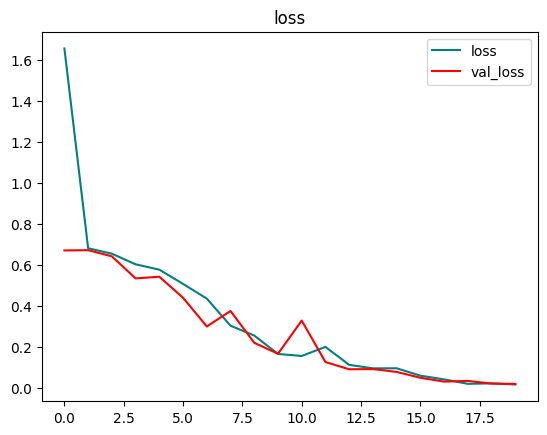

In [72]:
plt.plot(hist.history["loss"], color="teal", label="loss")
plt.plot(hist.history["val_loss"], color="red", label="val_loss")
plt.legend()
plt.title("loss")

In [74]:
hist.history["val_accuracy"]

[0.6875,
 0.609375,
 0.578125,
 0.84375,
 0.75,
 0.9375,
 0.953125,
 0.84375,
 0.921875,
 0.96875,
 0.859375,
 0.96875,
 1.0,
 0.953125,
 0.984375,
 1.0,
 1.0,
 0.984375,
 0.984375,
 1.0]

Text(0.5, 1.0, 'accuracy')

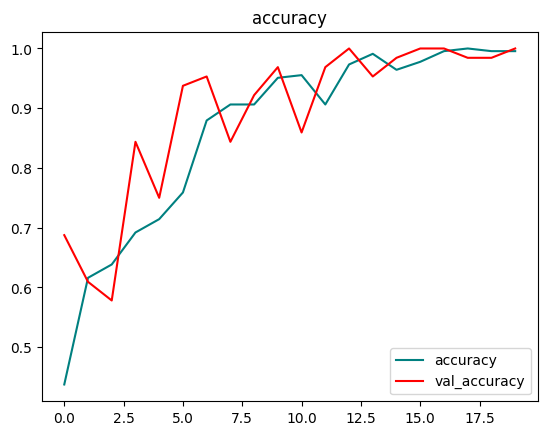

In [73]:
plt.plot(hist.history["accuracy"], color="teal", label="accuracy")
plt.plot(hist.history["val_accuracy"], color="red", label="val_accuracy")
plt.legend()
plt.title("accuracy")

# Testing

In [76]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [77]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [78]:
for batch in test.as_numpy_iterator():
    x, y = batch
    yhat = model.predict(x)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 197ms/step


In [87]:
print(
    f"""
precision = {pre.result().numpy()},
Recall = {re.result().numpy()}
Accuracy = {acc.result().numpy()}
"""
)


precision = 1.0,
Recall = 1.0
Accuracy = 1.0



## Testing new data

In [88]:
sample = cv2.imread("sample.jpg")

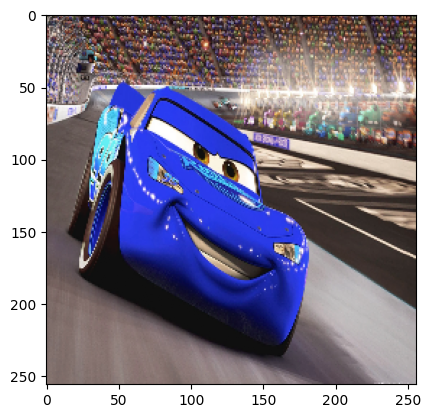

In [105]:
plt.imshow(resize / 255)

In [95]:
resize = tf.image.resize(sample, (256, 256))

In [98]:
sample_pred = model.predict(np.expand_dims(resize / 255, 0))

1/1 [==============================] - 0s 61ms/step


In [99]:
print("Itzz a Car!!") if sample_pred > 0.5 else print("Itz a Bike!!")

Itzz a Car!!


## Saving the model

In [103]:
model.save(os.path.join("models", "carandbikemodel.h5"))

c:\Users\VIJAY\anaconda3\envs\tensorflow\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
